In [36]:
import utility

utility.lj_potential(0.5,10)

7515.648

In [37]:
utility.pbc(43,10)

3

In [38]:
import init
#parameters
rho = 0.01
Npart = 108
box_length = (Npart / rho) ** (1/3)
# print(box_length)
bond_length = 2.353  #angstrom

k = 30
temp = 300 #kelvin
beta = 1

debug = True
accepted_steps = 0

In [39]:
positions = init.init_system(box_length, Npart)


In [40]:
positions
import random
import numpy as np


In [41]:
idx = random.randint(0,Npart-1)
idx

94

In [42]:
prev_position = np.copy(positions[idx])
prev_position

array([[ 5.99843389,  9.11774867, 12.34622867],
       [ 6.74191329,  9.64762153, 12.75423986]])

In [43]:
Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wo1

31.3574466957557

In [44]:
Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
for i in range(k-1):
    r = utility.generate_random_unit_vector() * bond_length
    positions[idx][1] = positions[idx][0] + r
    Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    
Wo = Wo1 * Wo2
print(Wo)

1035.6312158836301


In [45]:
positions[idx][0] = np.random.rand(3)* box_length
positions[idx][0]

array([14.20317888,  6.18205112, 16.76257208])

In [46]:
Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wn1

44.77472001469033

In [47]:
#select a random_chain
    global accepted_steps
    idx = random.randint(0,Npart-1)
    #find rosenbluth factor for previous configuration
    prev_position = np.copy(positions[idx])
    Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    for i in range(k-1):
        r = utility.generate_random_unit_vector() * bond_length
        positions[idx][1] = positions[idx][0] + r
        Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    
    Wo = Wo1 * Wo2
    #find rosenbluth factor for new configuration
    #choose a random postion for first atom
    positions[idx][0] = np.random.rand(3)* box_length
    Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    second_atom_pos = []
    Wn2 = []
    for i in range(k):
        r = utility.generate_random_unit_vector()* bond_length
        positions[idx][1] = positions[idx][0] + r
        second_atom_pos.append(positions[idx][1])
        Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))

    Wn2_sum = sum(Wn2)

    #select a configuration i with probaility Wn2[i]/Wn2_sum
    cum_Wn2 = Wn2[0]
    r_Wn2_sum = random.random()*Wn2_sum
    i = 0
    while cum_Wn2 < r_Wn2_sum:
        i +=1
        cum_Wn2 += Wn2[i]
    print(i, Wn2[i])
    Wn = Wn1 * Wn2_sum
    #replace position of second atom with selected second atom configuration 
    positions[idx][1] = second_atom_pos[i]
    print(Wo, " ", Wn)
    if Wn < Wo and random.random() > Wn/Wo:
        #not accept
        positions[idx] = prev_position   
    else :
        accepted_steps += 1
        if debug:
            print("new move accepted")
    
    return 


IndentationError: unexpected indent (223658740.py, line 2)

new move accepted
1.3547276553895107 36.70901646637063 0.07009963301977612 1.6554995881936871 0.9776043297445973
1.3547276553895107
new move accepted
1.099107745797054 34.81594978610323 0.023464746888574296 1.8425126641721044 1.9272971897763256
new move accepted
1.6261385025221553 40.75243536555033 0.055832067756944985 1.381836219253462 1.1890182737548933
new move accepted
1.0235508708842584 32.40251801530919 0.03282185556699974 1.9274370681612047 2.589668834603423
new move accepted
1.9132696217646943 31.524618683884597 0.054685684912412415 2.46004104755368 1.175415455919077
new move accepted
1.0579020573658757 38.99699475973712 0.03049799380519657 1.5024441845574596 2.2948491705750755
new move accepted
1.2319399135957978 31.382804927730803 0.04311540823868851 1.9825067885669532 1.589186433514872
new move accepted
1.0312115354343683 33.0023547496211 0.032922969184164444 1.881137383145085 2.3887547888751044
new move accepted
1.479081325495572 31.01516208450501 0.06603220578959046 2.2821

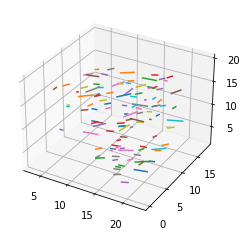

In [56]:
import init
import utility
import visualize
import random
import numpy as np

#parameters
rho = 0.01
Npart = 108
box_length = (Npart / rho) ** (1/3)
# print(box_length)
bond_length = 2.353  #angstrom

k = 30
temp = 300 #kelvin
beta = 1

debug = True
accepted_steps = 0

positions = init.init_system(box_length, Npart)

def check(positions):
    for pos in positions:
        if np.linalg.norm(pos[0] - pos[1]) > bond_length + 0.01:
            return False
    
    return True

def get_minimum_distance(positions, idx1, idx2):
    min_len = 1000
    for i in range(len(positions)):
        if idx1 !=i:
            for pos in positions[i]:
                min_len = min(min_len, utility.pbc(np.linalg.norm(pos - positions[idx1][idx2]),box_length))
    
    return min_len

def CBMC_step(positions, Npart):
    #select a random_chain
    global accepted_steps
    idx = random.randint(0,Npart-1)
    #find rosenbluth factor for previous configuration
    prev_position = np.copy(positions[idx])
    Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    for i in range(k-1):
        r = utility.generate_random_unit_vector() * bond_length
        positions[idx][1] = positions[idx][0] + r
        Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
    # print("Wo2" ,Wo2)
    Wo = Wo1 * Wo2
    #find rosenbluth factor for new configuration
    #choose a random postion for first atom
    positions[idx][0] = np.random.rand(3)* box_length
    Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
    second_atom_pos = []
    Wn2 = []
    for i in range(k):
        r = utility.generate_random_unit_vector()* bond_length
        positions[idx][1] = positions[idx][0] + r
        second_atom_pos.append(positions[idx][1])
        Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))
        # if get_minimum_distance(positions,idx,1) <1 and np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) >1:
            # print(Wn2[i],np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) )

    Wn2_sum = sum(Wn2)
    # print(Wn2_sum)
    #select a configuration i with probaility Wn2[i]/Wn2_sum
    cum_Wn2 = Wn2[0]
    r_Wn2_sum = random.random()*Wn2_sum
    i = 0
    while cum_Wn2 < r_Wn2_sum:
        i +=1
        cum_Wn2 += Wn2[i]
    # print(i, Wn2[i])
    Wn = Wn1 * Wn2_sum
    #replace position of second atom with selected second atom configuration 
    positions[idx][1] = second_atom_pos[i]
    # print(Wo, " ", Wn)
    if Wn < Wo and random.random() > Wn/Wo:
        #not accept
        positions[idx] = prev_position   
    else :
        accepted_steps += 1
        if debug:
            print("new move accepted")
            print(Wn2[i], Wn1,Wn2[i]/Wn2_sum, get_minimum_distance(positions,idx,0),get_minimum_distance(positions,idx,1))
            if get_minimum_distance(positions,idx,1) < 1:
                print(np.exp(-1*utility.energy_of_particle(idx,1,positions,box_length)))
                # print(Wn2)
                
                # return True
    
    return False

total_energy_sum = 0

for i in range(100):
    # visualize.visualize(positions)
    energy = utility.total_energy(positions,box_length)
    # print(energy)
    total_energy_sum += energy
    if CBMC_step(positions,Npart) == True:
        break


print(f"avg_energy {total_energy_sum / 100}")
print(f"Acceptance percentage {accepted_steps/1}")
visualize.visualize(positions)


In [52]:
a = [5,3,2,1,4]
b = sum(a)
b
a[1]

3

In [114]:

global accepted_steps
idx = random.randint(0,Npart-1)
#find rosenbluth factor for previous configuration
prev_position = np.copy(positions[idx])
Wo1 = k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
Wo2 = np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
for i in range(k-1):
    r = utility.generate_random_unit_vector() * bond_length
    positions[idx][1] = positions[idx][0] + r
    Wo2 += np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length))
# print("Wo2" ,Wo2)
Wo = Wo1 * Wo2
#find rosenbluth factor for new configuration
#choose a random postion for first atom
positions[idx][0] = np.random.rand(3)* box_length
Wn1 =  k * np.exp(-beta * utility.energy_of_particle(idx,0,positions,box_length))
second_atom_pos = []
Wn2 = []
for i in range(k):
    r = utility.generate_random_unit_vector()* bond_length
    positions[idx][1] = positions[idx][0] + r
    second_atom_pos.append(positions[idx][1])
    Wn2.append(np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)))
    # if get_minimum_distance(positions,idx,1) <1 and np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) >1:
        # print(Wn2[i],np.exp(-beta * utility.energy_of_particle(idx,1,positions,box_length)) )

Wn2_sum = sum(Wn2)
# print(Wn2_sum)
#select a configuration i with probaility Wn2[i]/Wn2_sum
cum_Wn2 = Wn2[0]
r_Wn2_sum = random.random()*Wn2_sum
i = 0
while cum_Wn2 < r_Wn2_sum:
    i +=1
    cum_Wn2 += Wn2[i]
# print(i, Wn2[i])
Wn = Wn1 * Wn2_sum
#replace position of second atom with selected second atom configuration 
positions[idx][1] = second_atom_pos[i]
# print(Wo, " ", Wn)
if Wn < Wo and random.random() > Wn/Wo:
    #not accept
    positions[idx] = prev_position   
else :
    accepted_steps += 1
    if debug:
        print("new move accepted")
        print(Wn2[i], Wn1,Wn2[i]/Wn2_sum, get_minimum_distance(positions,idx,0),get_minimum_distance(positions,idx,1))
        if get_minimum_distance(positions,idx,1) < 1:
            print(np.exp(-1*utility.energy_of_particle(idx,1,positions,box_length)))
            # print(Wn2)
            
            # return True

In [117]:
a= np.array((3,1))
c = []
for i in range(10):
    a +=1
    c.append(a)
print(c)

[array([13, 11]), array([13, 11]), array([13, 11]), array([13, 11]), array([13, 11]), array([13, 11]), array([13, 11]), array([13, 11]), array([13, 11]), array([13, 11])]
